In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [41]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])
combined_data_df = combined_data_df.rename(columns={"Age_months": "Age(months)"})

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age(months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [42]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].unique())
total_mice

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

duplicate_mice_ID = combined_data_df.loc[duplicate_mice, "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_df = combined_data_df.loc[combined_data_df["Mouse ID"] =="g989"]
duplicate_mouse_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age(months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data_df = combined_data_df.drop(duplicate_mouse_ID_df.index)

# Store to data file
cleaned_data_df.to_csv("data/cleaned_data.csv", index=False, header=True)

cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age(months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [46]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(cleaned_data_df["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = cleaned_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = cleaned_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = cleaned_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = cleaned_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = cleaned_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table_df = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":std,
                              "Tumor Volume Std. Err.":sem})
summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Aggregation Method

summary_table = cleaned_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grouped_drug_regimen  = cleaned_data_df.groupby("Drug Regimen")


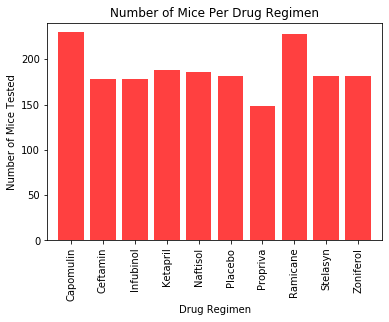

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PYPLOT.
#x axis
x_axis = np.arange(len(grouped_drug_regimen["Drug Regimen"]))

#y axis
mouse_count = grouped_drug_regimen["Mouse ID"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="center")

#tick mark management
tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

# Give our chart some labels and a tile
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Save an image of the chart and print it to the screen
plt.savefig("images/mouse_count_df.png")
plt.show()

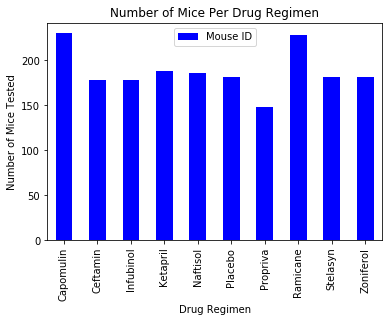

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count_bar_chart = mouse_count_df.plot(kind="bar", color="b")

# Give our chart some labels and a tile
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Save an image of the chart and print it to the screen
plt.savefig("images/mouse_count.png")
plt.show()

# Female vs. Male mice

In [52]:
sex_mice = cleaned_data_df.groupby("Sex")["Sex"].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

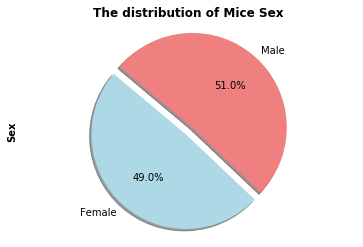

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice = sex_mice.index
colors = ["lightblue", "lightcoral"]
explode = (0.1,0)
# Create pie chart
py_mice_sex = plt.pie(sex_mice, explode=explode, labels=mice, colors=colors,
                    autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plt.title("The distribution of Mice Sex", fontweight="bold")
plt.ylabel("Sex", fontweight="bold")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/py_mice_sex.png")
plt.show()

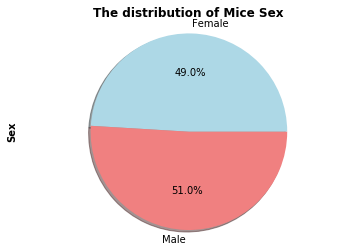

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_mice_sex = sex_mice.plot(kind="pie", colors=colors, autopct="%1.1f%%", shadow=True)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plt.title("The distribution of Mice Sex", fontweight="bold")
plt.ylabel("Sex", fontweight="bold")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/pie_mice_sex.png")
plt.show()

# Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_vol = cleaned_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

# Put treatments into a list for for loop (and later for plot labels)

regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

final_tumor_vol_list = []

# For loop

for drug in regimen:

    final_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]

    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Print the results
    print(f"{drug} Regimen")
    print(f"Final Tumor Volume (mm3) for {drug} below {round(lower_bound,4)} could be outliers.")
    print(f"Final Tumor Volume (mm3) for {drug} above {round(upper_bound,4)} could be outliers.")
    print(f"Average Tumor Volume (mm3) for {drug} is {round(mean,4)}")
    print(f"Number of outliers for {drug} is {round(outliers.count(),4)}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Outlier final tumor volume (mm3) is {round(outliers[i],4)}")

    print("--------------------------------------------------------")




Capomulin Regimen
Final Tumor Volume (mm3) for Capomulin below 20.7046 could be outliers.
Final Tumor Volume (mm3) for Capomulin above 51.832 could be outliers.
Average Tumor Volume (mm3) for Capomulin is 36.6676
Number of outliers for Capomulin is 0
--------------------------------------------------------
Ramicane Regimen
Final Tumor Volume (mm3) for Ramicane below 17.9127 could be outliers.
Final Tumor Volume (mm3) for Ramicane above 54.3068 could be outliers.
Average Tumor Volume (mm3) for Ramicane is 36.1914
Number of outliers for Ramicane is 0
--------------------------------------------------------
Infubinol Regimen
Final Tumor Volume (mm3) for Infubinol below 36.8329 could be outliers.
Final Tumor Volume (mm3) for Infubinol above 82.7414 could be outliers.
Average Tumor Volume (mm3) for Infubinol is 58.1782
Number of outliers for Infubinol is 1
Outlier final tumor volume (mm3) is 36.3213
--------------------------------------------------------
Ceftamin Regimen
Final Tumor Volume

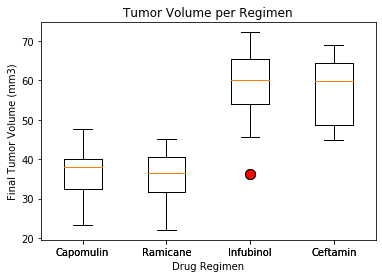

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, final_tumor = plt.subplots()
final_tumor.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
final_tumor.set_xlabel("Drug Regimen")
final_tumor.set_ylabel("Final Tumor Volume (mm3)")
final_tumor.set_title("Tumor Volume per Regimen")
final_tumor.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

plt.savefig("Images/final_tumor_boxplot.png")
plt.show()



# Line and Scatter Plots

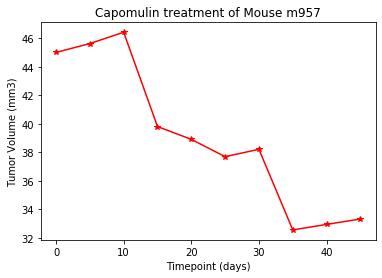

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate dataframe only in Capomulin Regimen
capomulin_df = cleaned_data_df.loc[cleaned_data_df['Drug Regimen'] == 'Capomulin']
#capomulin_df


# Choose a mouse ID and create get data
mouse = "m957"
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse]

x = mouse_df["Timepoint"]
y = mouse_df["Tumor Volume (mm3)"]

# Generate line plot
plt.title("Capomulin treatment of Mouse m957")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
time_volume = plt.plot(x, y, color="red", marker="*", label="Mouse ID m957")

plt.savefig("Images/time_volume_plot.png")
plt.show()




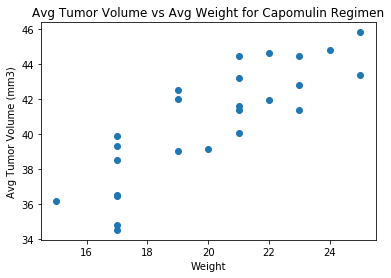

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = capomulin_df.groupby("Mouse ID")
mice_avg_weight = capomulin_mice["Weight (g)"].mean()
mice_avg_tumor = capomulin_mice["Tumor Volume (mm3)"].mean()

plt.title("Avg Tumor Volume vs Avg Weight for Capomulin Regimen")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Weight")

plt.scatter(mice_avg_weight, mice_avg_tumor)

plt.savefig("Images/avg_tumor_weight.png")
plt.show()


# Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708721


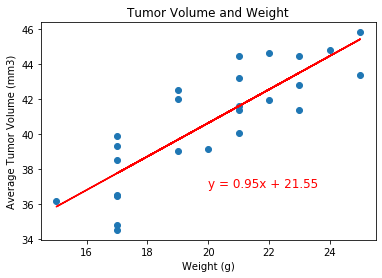

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mice_avg_weight
y_values = mice_avg_tumor

# Correlation
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Add the lineat regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/tumor_weight_lin.png")
plt.show()
